In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
from pyramid.arima import auto_arima

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
del data['report_url']

In [4]:
data = data[~data.index.duplicated(keep='last')]

In [5]:
data.describe()

,global_cases
count,61.000000
mean,118471.803279
std,126036.961206
min,2798.000000
25%,43103.000000
50%,81109.000000
75%,125260.000000
max,571678.000000


In [6]:
data.head()

,global_cases
date,
2020-01-27,2798
2020-01-28,4593
2020-01-29,6065
2020-01-30,7818
2020-01-31,9826


In [7]:
data.tail()

,global_cases
date,
2020-03-24,372757
2020-03-25,414179
2020-03-26,462684
2020-03-27,509164
2020-03-28,571678


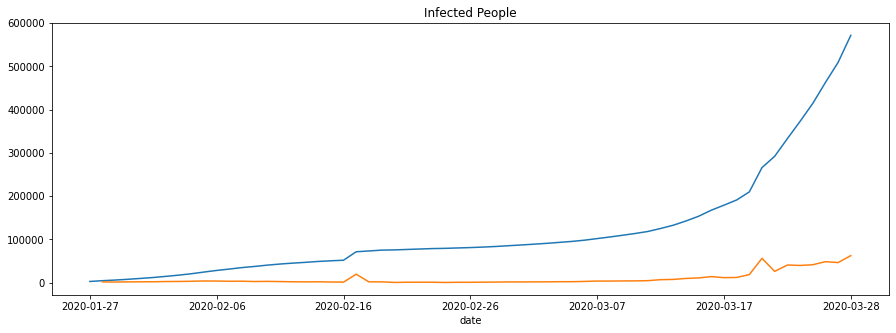

In [8]:
data.global_cases.plot(figsize=(15, 5), title='Infected People')
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [9]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [10]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1210.375, BIC=1222.840, Fit time=4.641 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1227.667, BIC=1231.822, Fit time=0.021 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1211.891, BIC=1218.124, Fit time=0.429 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1212.792, BIC=1219.025, Fit time=1.371 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1209.060, BIC=1219.448, Fit time=4.581 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1212.369, BIC=1220.680, Fit time=1.954 seconds
Fit ARIMA: order=(1, 2, 3); AIC=1210.394, BIC=1222.859, Fit time=5.132 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=1211.910, BIC=1220.220, Fit time=1.023 seconds
Total fit time: 21.804 seconds


In [11]:
stepwise_model.aic()

1209.060283015413

In [12]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-03-29 - 632765
2020-03-30 - 698084
2020-03-31 - 767585
2020-04-01 - 841220
2020-04-02 - 918940
